In [1]:
#before you start with this lecture, go on the net and study kernel density esteemation

In [2]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# rug plot
# carpet plot

In [4]:
dataset = randn(25)

(0, 1)

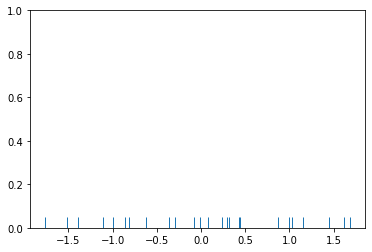

In [5]:
sns.rugplot(dataset)


plt.ylim(0,1)

In [6]:
#plotting a histogram on top of that

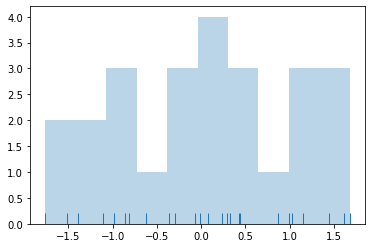

In [7]:
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

(0, 1)

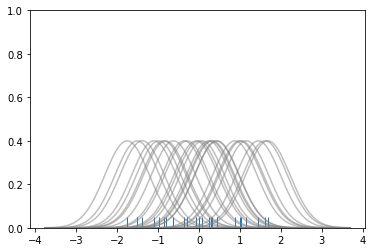

In [8]:
sns.rugplot(dataset)


x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min,x_max,100)

bandwidth =(4*dataset.std()**5 / (3*len(dataset)))**0.2

kernel_list = []

for data_point in dataset:
    
    #create a kernel for each point and append it to the kernel list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    
    #scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis,kernel,color='grey',alpha=0.5)
    
    
plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the basis functions')

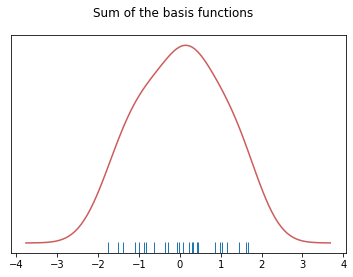

In [9]:
sum_of_kde = np.sum(kernel_list,axis=0)

fig = plt.plot(x_axis,sum_of_kde,color='indianred')

sns.rugplot(dataset)

plt.yticks([])

plt.suptitle('Sum of the basis functions')

In [10]:
# using seaborn to do all that, in one sim ple go

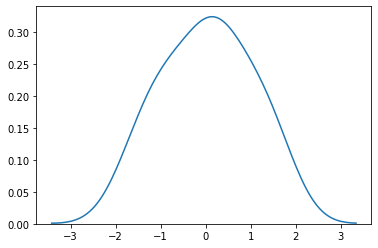

In [11]:
sns.kdeplot(dataset)

In [12]:
dataset

array([ 1.61279084,  0.32158088, -0.07506469,  0.87366508, -0.86316313,
        1.03121227,  0.07616434,  1.15470053,  1.44598229,  0.29050488,
        0.42808634, -1.39089203,  0.43719966, -1.7604763 , -0.298388  ,
       -0.62656406,  1.68020027, -0.01180342, -0.81935962, -1.51311112,
        0.23306344, -0.99023423, -0.36391496, -1.10414281,  0.9927878 ])

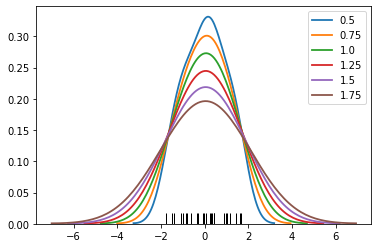

In [13]:
sns.rugplot(dataset,color='black')

for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)

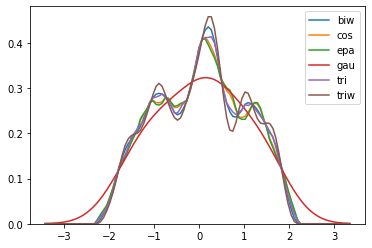

In [14]:
kernel_options = ['biw','cos','epa','gau','tri','triw']



for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern)

In [15]:
#shadding

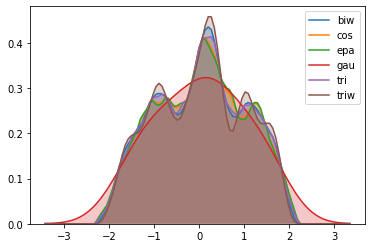

In [16]:
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True)

In [17]:
#plotting on the y axis

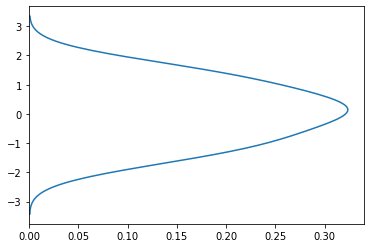

In [18]:
sns.kdeplot(dataset,vertical=True)

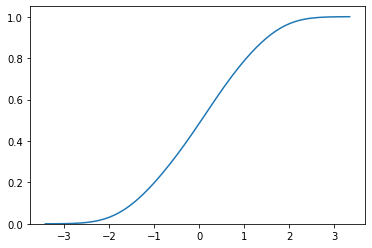

In [29]:
sns.kdeplot((dataset),cumulative=True)

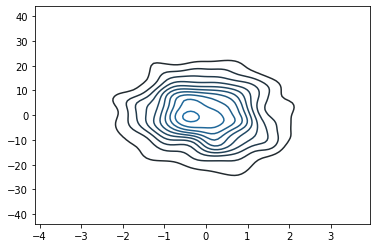

In [36]:
mean = [0,0]

cov = [[1,0],[0,100]]

dataset2 = np.random.multivariate_normal(mean,cov,1000)

dframe = pd.DataFrame(dataset2,columns=['X','Y'])

sns.kdeplot(dframe,[1000])

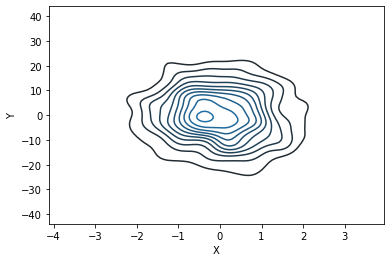

In [37]:
sns.kdeplot(dframe.X,dframe.Y)

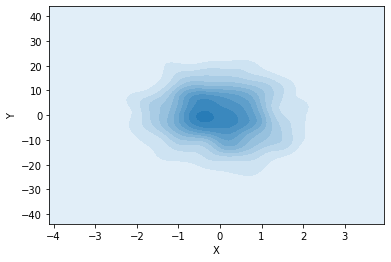

In [39]:
sns.kdeplot(dframe.X,dframe.Y,shade=True)

In [40]:
#specifying bandwidths

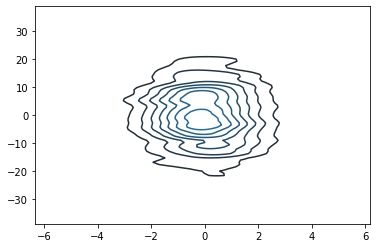

In [41]:
sns.kdeplot(dframe,bw=1)

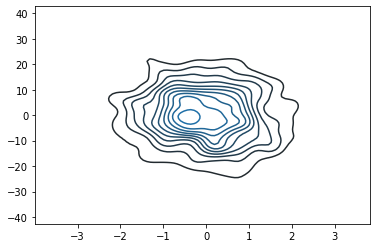

In [42]:
sns.kdeplot(dframe,bw='silverman')

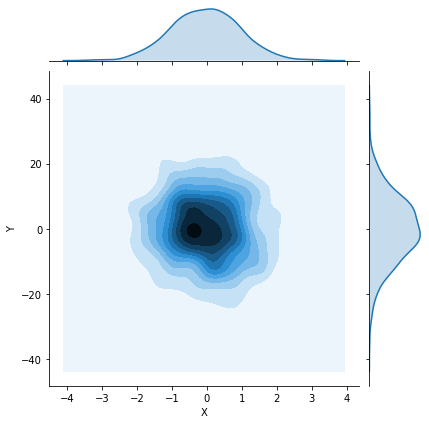

In [43]:
sns.jointplot('X','Y',dframe,kind='kde')